In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [0]:
products = pd.read_csv('gdrive/My Drive/tiki_analysis/Tiki.csv')

In [0]:
products.head()

### Tiki was established to improve Vietnamese reading spirit, especially books in English. Therefore the main aim of Tiki is selling international books. Firstly, we will analyze the book category.

Firstly, get sample number of books.
Then, categorize them in Domestic and International

In [0]:
books = products[products["category"]=="Sách, VPP & Quà Tặng"]
books['Type'] = books["subcategory"].apply(lambda x: "Domestic" if "Sách tiếng Việt" in x else "International" )
books.head()

What is the book type distribution?

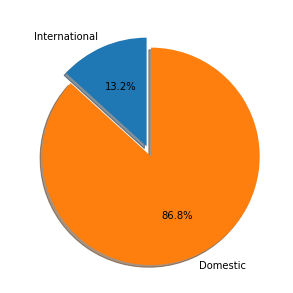

In [0]:
labels = ["International","Domestic"]
sizes = [books[books["Type"]=="International"].product_id.count(), books[books["Type"]=="Domestic"].product_id.count()]
explode = (0, 0.1)
plt.figure(figsize=(5,5))
plt.pie(sizes,labels=labels,explode = explode,autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

#### Tiki main goal is selling international books. However, from the observation, domestic books have a higher density. Why tiki go against its original goal?

In [0]:
def satisfaction_level(x):
    if x <= 20:
        return "Very disatisfied"
    elif x <= 40:
        return "Disatisfied"
    elif x <= 60:
        return "Neutral"
    elif x <= 80:
        return "Satisfied"
    elif x <= 100:
        return "Very Satisfied"
    else:
        return "No rating"

In [0]:
books["satisfaction_levels"] = books["rating"].apply(satisfaction_level)
books.sample(50)

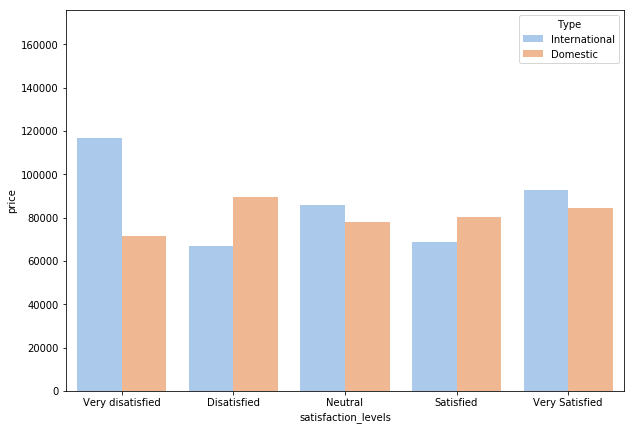

In [0]:
plt.figure(figsize=(10,7))
sns.barplot(x=books["satisfaction_levels"],y=books["price"],\
                 hue=books["Type"],palette="pastel",\
                 order = ["Very disatisfied","Disatisfied","Neutral","Satisfied","Very Satisfied"],\
                 errwidth = 0)
                 
plt.show()

In [0]:
table_SLT = pd.crosstab(books["Type"],books["satisfaction_levels"])
table_SLT.sum()

satisfaction_levels
Disatisfied           88
Neutral              306
No rating           2576
Satisfied           1222
Very Satisfied      5714
Very disatisfied      78
dtype: int64

In [0]:
table_SLT['Total'] = table_SLT.sum(axis=1)
percent = table_SLT.apply(lambda x: (x/table_SLT['Total'])*100)
percent

satisfaction_levels,Disatisfied,Neutral,No rating,Satisfied,Very Satisfied,Very disatisfied,Total
Type,,,,,,,
Domestic,0.808127,2.920804,25.375202,12.168091,58.000462,0.727315,100.0
International,1.361573,4.009077,28.593041,12.708018,52.193646,1.134644,100.0


**According to the above bar plot and the cross table,  internation books have high price but low rating rate. Therefore to provide better services and increase the sales volumne, tiki go against it first goal and focusing more on selling domestic books than international books. However, Tiki is still success in selling international and domestic books. As a result, Tiki expanded its business by selling more range of products (15 more categories)**

## Analysis all categories 



### Which category has the highest average rating ?

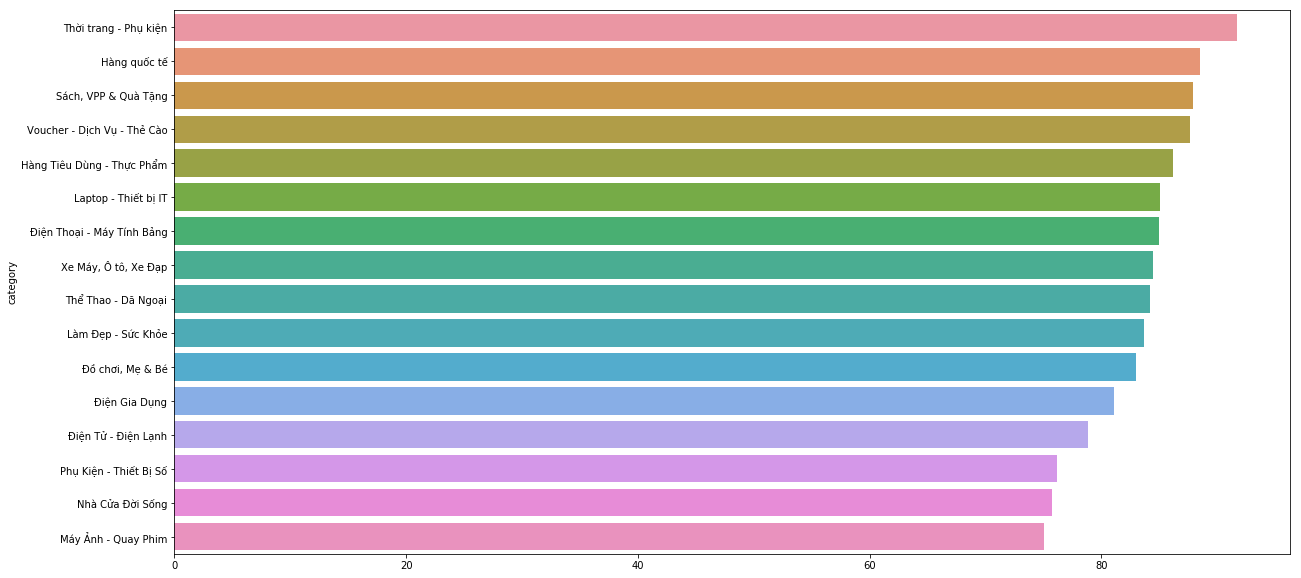

In [0]:
mean_rating = products.groupby("category")["rating"].mean().sort_values(ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(y = mean_rating.index,x = mean_rating.values)

**Overall, customers' satisfaction is high for all categories on Tiki. Which fashion and accessories ("Thoi trang - phu kien") is the most favorite category. On the other hand, camera is the worst category. **

### What category has the highest average price ? 

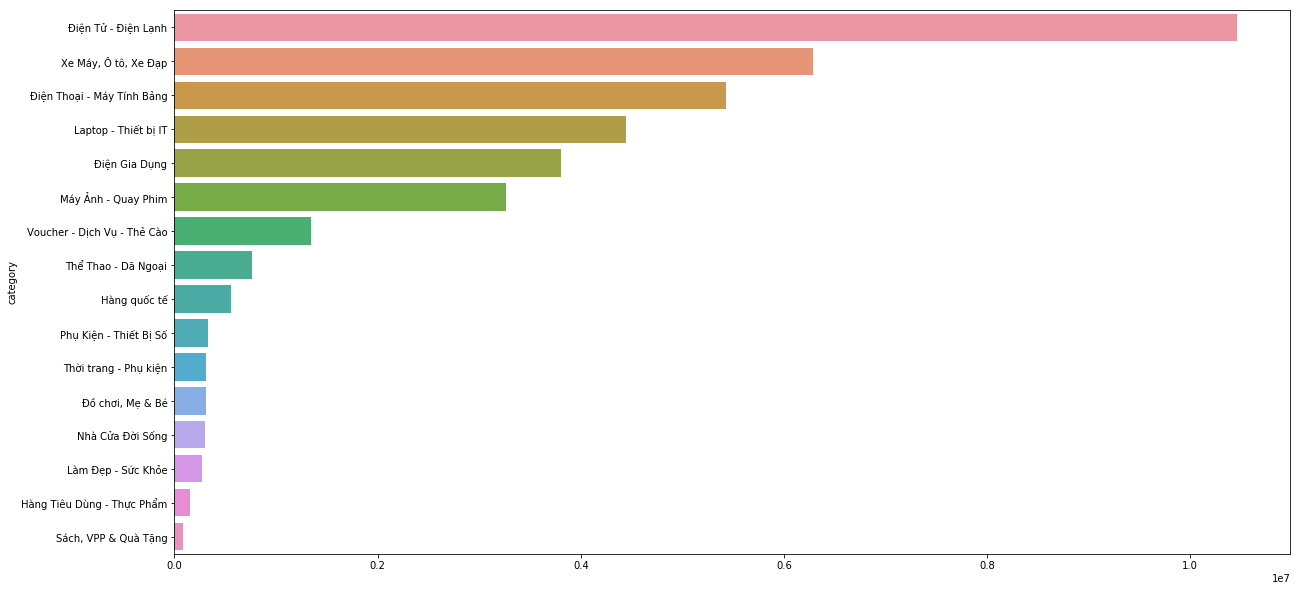

In [0]:
mean_price = products.groupby("category")["price"].mean().sort_values(ascending=False)
plt.figure(figsize=(20,10))
ax = sns.barplot(y = mean_price.index,x = mean_price.values)

According to the chart, Electric equipments, motorbike & car & bike, phone & tablet occupied top 3 average price on Tiki.

### The distribution of price in phone and tablet category

In [0]:
dienthoai = products[products["category"]=="Điện Thoại - Máy Tính Bảng"]
sns.barplot(dienthoai["price"])

In [0]:
dienthoai["price"].describe()

In [0]:
sns.distplot(dienthoai["price"])

### Which brand has the highest price in phone and tablet category ?

In [0]:
def brand_price(df):
    mean_price = df.groupby(["brand","subcategory"])["price"].mean().sort_values(ascending=False).head(20)
    plt.figure(figsize=(20,30))
    sns.barplot(y = mean_price.index,x = mean_price.values)

In [0]:
dienthoai = products[products["category"]=="Điện Thoại - Máy Tính Bảng"]
brand_price(dienthoai)

### Which brand has the highest the rating ?

In [0]:
def brand_rating(df):
    mean_rating = df.groupby(["brand","subcategory"])["rating"].mean().sort_values(ascending=False).head(15)
    plt.figure(figsize=(20,10))
    sns.barplot(y = mean_rating.index,x = mean_rating.values)

In [0]:
brand_rating(dienthoai)

### Which brand has the highest the rate of discount ?

In [0]:
def brand_discount(df):
    mean_discount = df.groupby(["brand","subcategory"])["discount"].mean().sort_values(ascending=False).head(15)
    plt.figure(figsize=(20,10))
    sns.barplot(y = mean_discount.index,x = mean_discount.values)

In [0]:
dienthoai = products[products["category"]=="Điện Thoại - Máy Tính Bảng"]
brand_discount(dienthoai)

### The relationship between brand and tikinow feature

In [0]:
table_BTN = pd.crosstab(dienthoai["brand"],dienthoai["tikinow"])
table_BTN

In [0]:
brand_minimum_tikinow = table_BTN[table_BTN[0] == table_BTN[0].max()]
brand_maximum_tikinow = table_BTN[table_BTN[1] == table_BTN[1].max()]
print(brand_minimum_tikinow)
print(brand_maximum_tikinow)

### Is there a relationship bewteen brand and tikinow feature?

In [0]:
stat, p, dof, expected = chi2_contingency(table_BTN)
print("p =",p)
if p <= 0.05:
    print("There is a relationship between brand and tikinow")
else:
    # p is the probablity that when the null hypothesis is true, the statistical summary 
    # (such as the absolute value of the sample mean difference between two compared groups)
    # would be greater than or equal to the actual observed results.
    print("There is no relationship between brand and tikinow")

In [0]:
plt.figure(figsize=(50,100))
table_BTN.sample(30).plot.bar(stacked = True)

### Is there a relationship between price and rating ? 

In [0]:
products[['rating','price']].corr()

In [0]:
sns.jointplot(x=products['rating'],y=products['price'])